In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/Users/zihao/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zihao/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('../nyse/prices.csv')

In [3]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [6]:
dfge = df[df['symbol'] == 'GE']

In [7]:
train_df = dfge[dfge['date'] < '2016-01-01']

In [8]:
test_df = dfge[dfge['date'] >= '2016-01-01']

In [13]:
train_df[['date', 'open', 'close', 'low', 'high', 'volume']]

,date,open,close,low,high,volume
434,2010-01-04,15.220000,15.450000,15.150000,15.640000,67079900.0
902,2010-01-05,15.460000,15.530000,15.450000,15.670000,64550600.0
1370,2010-01-06,15.530000,15.450000,15.440000,15.620000,55464900.0
1838,2010-01-07,15.480000,16.250000,15.430000,16.480000,185472300.0
2306,2010-01-08,16.309999,16.600000,16.270000,16.690001,115112600.0
...,...,...,...,...,...,...
723088,2015-12-24,30.900000,30.830000,30.690001,30.930000,13518900.0
723587,2015-12-28,30.740000,30.900000,30.610001,31.000000,26557700.0
724086,2015-12-29,31.010000,31.280001,31.000000,31.480000,33400400.0
724585,2015-12-30,31.280001,31.049999,31.010000,31.440001,29127700.0


In [16]:
X_train = train_df[['open', 'close', 'low', 'high', 'volume']].iloc[:-5,:]

```
[1, 2, 3, 4, 5, ..., 1510]

X_train [1, 2, ..., 1505]
y_train [6, 7, ..., 1510]
```

In [17]:
y_train = train_df['open'].iloc[5:]

In [18]:
X_train.shape

(1505, 5)

In [19]:
y_train

2774      16.830000
3242      16.580000
3710      16.760000
4178      16.790001
4646      16.680000
            ...    
723088    30.900000
723587    30.740000
724086    31.010000
724585    31.280001
725084    30.860001
Name: open, Length: 1505, dtype: float64

In [25]:
X_test = test_df[['open', 'close', 'low', 'high', 'volume']].iloc[:-5,:]
y_test = test_df['open'].iloc[5:]

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = lr.predict(X_test)

Text(0, 0.5, 'true val')

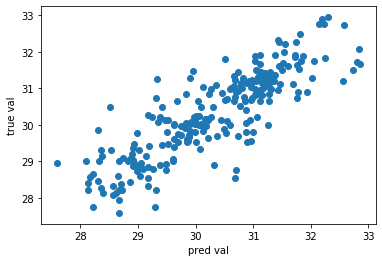

In [29]:
plt.scatter(y_pred, y_test)
plt.xlabel("pred val")
plt.ylabel("true val")

In [30]:
L = len(y_test)

In [33]:
y_test.shape, y_pred.shape

((247,), (247,))

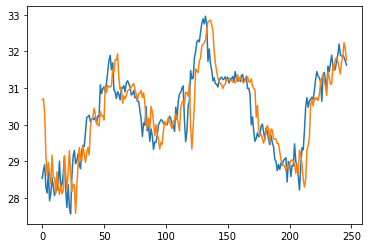

In [32]:
plt.plot(np.arange(L), y_test)
plt.plot(np.arange(L), y_pred)

In [34]:
lr.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

TA-Lib
https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
https://mrjbq7.github.io/ta-lib/index.html

feature scaling
return (o_{d+5} - o_{d}) / o_{d}